<b>K-MEANS AND GA</b>

In [2]:
import numpy as np

In [3]:
def loadDataset(filename):
    ds = np.loadtxt(filename, delimiter='\t')
    return ds

In [4]:
data = loadDataset('seeds.txt')
dataset = data[:,:8]
k=3

In [7]:
def normalize(data):
    print(data)
    return (data-data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))

In [9]:
datasets = dataset.copy()
datasets = datasets[:,:8]
datasets = normalize(datasets)
datasets[1]

[[15.26   14.84    0.871  ...  2.221   5.22    1.    ]
 [14.88   14.57    0.8811 ...  1.018   4.956   1.    ]
 [14.29   14.09    0.905  ...  2.699   4.825   1.    ]
 ...
 [13.2    13.66    0.8883 ...  8.315   5.056   3.    ]
 [11.84   13.21    0.8521 ...  3.598   5.044   3.    ]
 [12.3    13.34    0.8684 ...  5.637   5.063   3.    ]]


array([0.40509915, 0.44628099, 0.66243194, 0.36880631, 0.50106914,
       0.03288302, 0.21516494, 0.        ])

In [399]:
#use 3-cluster
cen = []
get = []
cen.append(datasets[0:70])
cen.append(datasets[71:140])
cen.append(datasets[141:210])
for i in range(k):
    np.random.shuffle(cen[i])
    get.append(cen[i][50])
initC = np.array(get)
initC
#truly random
# centroids = datasets.copy()
# np.random.shuffle(centroids)
# initC = centroids[:k]
# initC

array([[0.41737488, 0.48553719, 0.52268603, 0.50112613, 0.4383464 ,
        0.13339141, 0.23732152, 0.        ],
       [0.47025496, 0.5661157 , 0.40471869, 0.57488739, 0.42836778,
        0.24378161, 0.66962088, 0.5       ],
       [0.04060434, 0.12190083, 0.09800363, 0.23986486, 0.05060584,
        0.77622905, 0.31708518, 1.        ]])

In [400]:
def euclid(v1, v2, length): 
    dist = 0
    for i in range(length):
        dist += pow((v1[i]-v2[i]), 2)
    return (np.sqrt(dist))

In [401]:
centroids.shape

(210, 7)

In [402]:
def new_centroid(cluster, index, new_c):
    i = index
    length = len(cluster[i])
    centro = []
    data_ = []
    for a in range(7):
        centro.append([])
    for x in range(length):
        data_ = datasets[cluster[i][x], :-1]
        for y in range(len(data_)):
            centro[y].append(data_[y])
    for z in range(len(data_)):
        Centro = np.mean(centro[z])
        new_c[index].append(Centro)
    return new_c

In [403]:
initC[1,:-1]

array([0.47025496, 0.5661157 , 0.40471869, 0.57488739, 0.42836778,
       0.24378161, 0.66962088])

In [404]:
def clustering(dataset, centroid):
    cluster = []
    new_c = []
    for i in range(k):
        cluster.append([])
        new_c.append([])
    for i in range(len(dataset)):
        dist = []
        for j in range(len(initC)):
            dist.append(euclid(datasets[i,:], centroid[j,:], 7)) # calculate distance all data with centroid
        ind = np.argmin(dist) # get minimum dist to clustering
        cluster[ind].append(i)
    for i in range(k):
        centroid_ = new_centroid(cluster, i, new_c)
    centroid_ = np.array(centroid_)
    return centroid_, np.array(cluster)

In [405]:
# init centroid (k=1)
centroid, cluster = clustering(datasets[:,:-1], initC[:,:-1])
centroid

array([[0.32653208, 0.35934721, 0.65170346, 0.30952075, 0.41480733,
        0.25499526, 0.26932546],
       [0.72443867, 0.76512282, 0.6732078 , 0.70590121, 0.73701196,
        0.37346229, 0.73731468],
       [0.10968134, 0.16570948, 0.33738349, 0.18619255, 0.13990601,
        0.56116969, 0.29769922]])

In [406]:
# init centroid (k after 1)
for i in range(k-1):
    centroid, cluster = clustering(datasets[:,:-1], centroid)
    print(centroid)

[[0.34369426 0.3771809  0.66364186 0.32352665 0.43394116 0.25915368
  0.27203348]
 [0.73267366 0.77141776 0.68399325 0.70942774 0.7476233  0.3679873
  0.73979376]
 [0.1143433  0.16905144 0.35097651 0.18804626 0.14573249 0.52771283
  0.29575902]]
[[0.35538443 0.38930276 0.66864344 0.33670378 0.44306466 0.26063379
  0.28653061]
 [0.73967785 0.77775782 0.68701176 0.7143883  0.75408803 0.36780924
  0.74493895]
 [0.11652502 0.17069067 0.35690952 0.18662323 0.15142043 0.51798693
  0.28833087]]


In [407]:
from sklearn.decomposition import IncrementalPCA
import matplotlib.pyplot as plt
import random

In [408]:
# to get x,y from 7 fitur
X = dataset
ipca = IncrementalPCA(n_components=2)
ipca.fit(X)
pca = ipca.transform(X)
# pca[:,0]
# dataset[:,-1:]
C = centroid
ipca2 = IncrementalPCA(n_components=2)
ipca2.fit(C)
pca2 = ipca2.transform(C)
cluster[0][0]

0

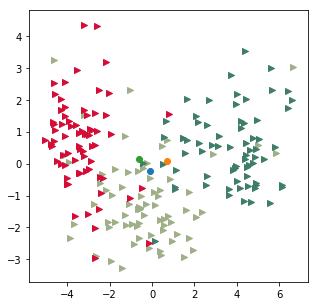

In [409]:
fig, axs = plt.subplots(1, 1, figsize=(5,5))
for i in range(k):
    color = "#%06x" % random.randint(0, 0xFFFFFF)
    for j in range(len(cluster[i])):
        ke = cluster[i][j]
        x = pca[ke,0]
        y = pca[ke,1]
        axs.scatter(x,y,color=color,marker=">")
    axs.scatter(pca2[i,0], pca2[i,1], marker="o")
plt.show()

In [410]:
true = 0
false = 0

for i in range(len(cluster)):
    lst = []
    for j in range(len(cluster[i])):
        ke = cluster[i][j]
        lst.append(dataset[ke,-1:])
    cls = int(max(lst,key=lst.count))
    print(cls)
    for j in range(len(cluster[i])):
        ke = cluster[i][j]
        if (dataset[ke,-1:] == cls):
            true += 1;
        else:
            false += 1;
print(true, false)
err = ((210)-true)/210*100
print(err)

1
2
3
193 17
8.095238095238095


In [411]:
cluster

array([list([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 88, 96, 119, 136, 143, 154, 160, 172, 188]),
       list([15, 37, 54, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139]),
       list([13, 23, 51, 53, 68, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 155, 156, 157, 158, 159, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209])],
      dtype=ob